**Make The Data Being Used and Initialistation**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from xgboost import XGBRegressor
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


In [2]:
# Importing the data 
item = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/items.csv')
shop = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/shops.csv')
sales_train = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv')
item_categories = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv')
testd = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/test.csv')
sampl = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv')

In [3]:
sampl.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [4]:
# seeing teh basic structure of the dta in teh frame 
data = [item,shop,sales_train,testd,item_categories,sampl]
for i in data:
    print(i.info())
    print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4

In [5]:
#Finding Any Null values
sales_train.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [6]:
# Some Anylysis Seeing Tools Imported
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix

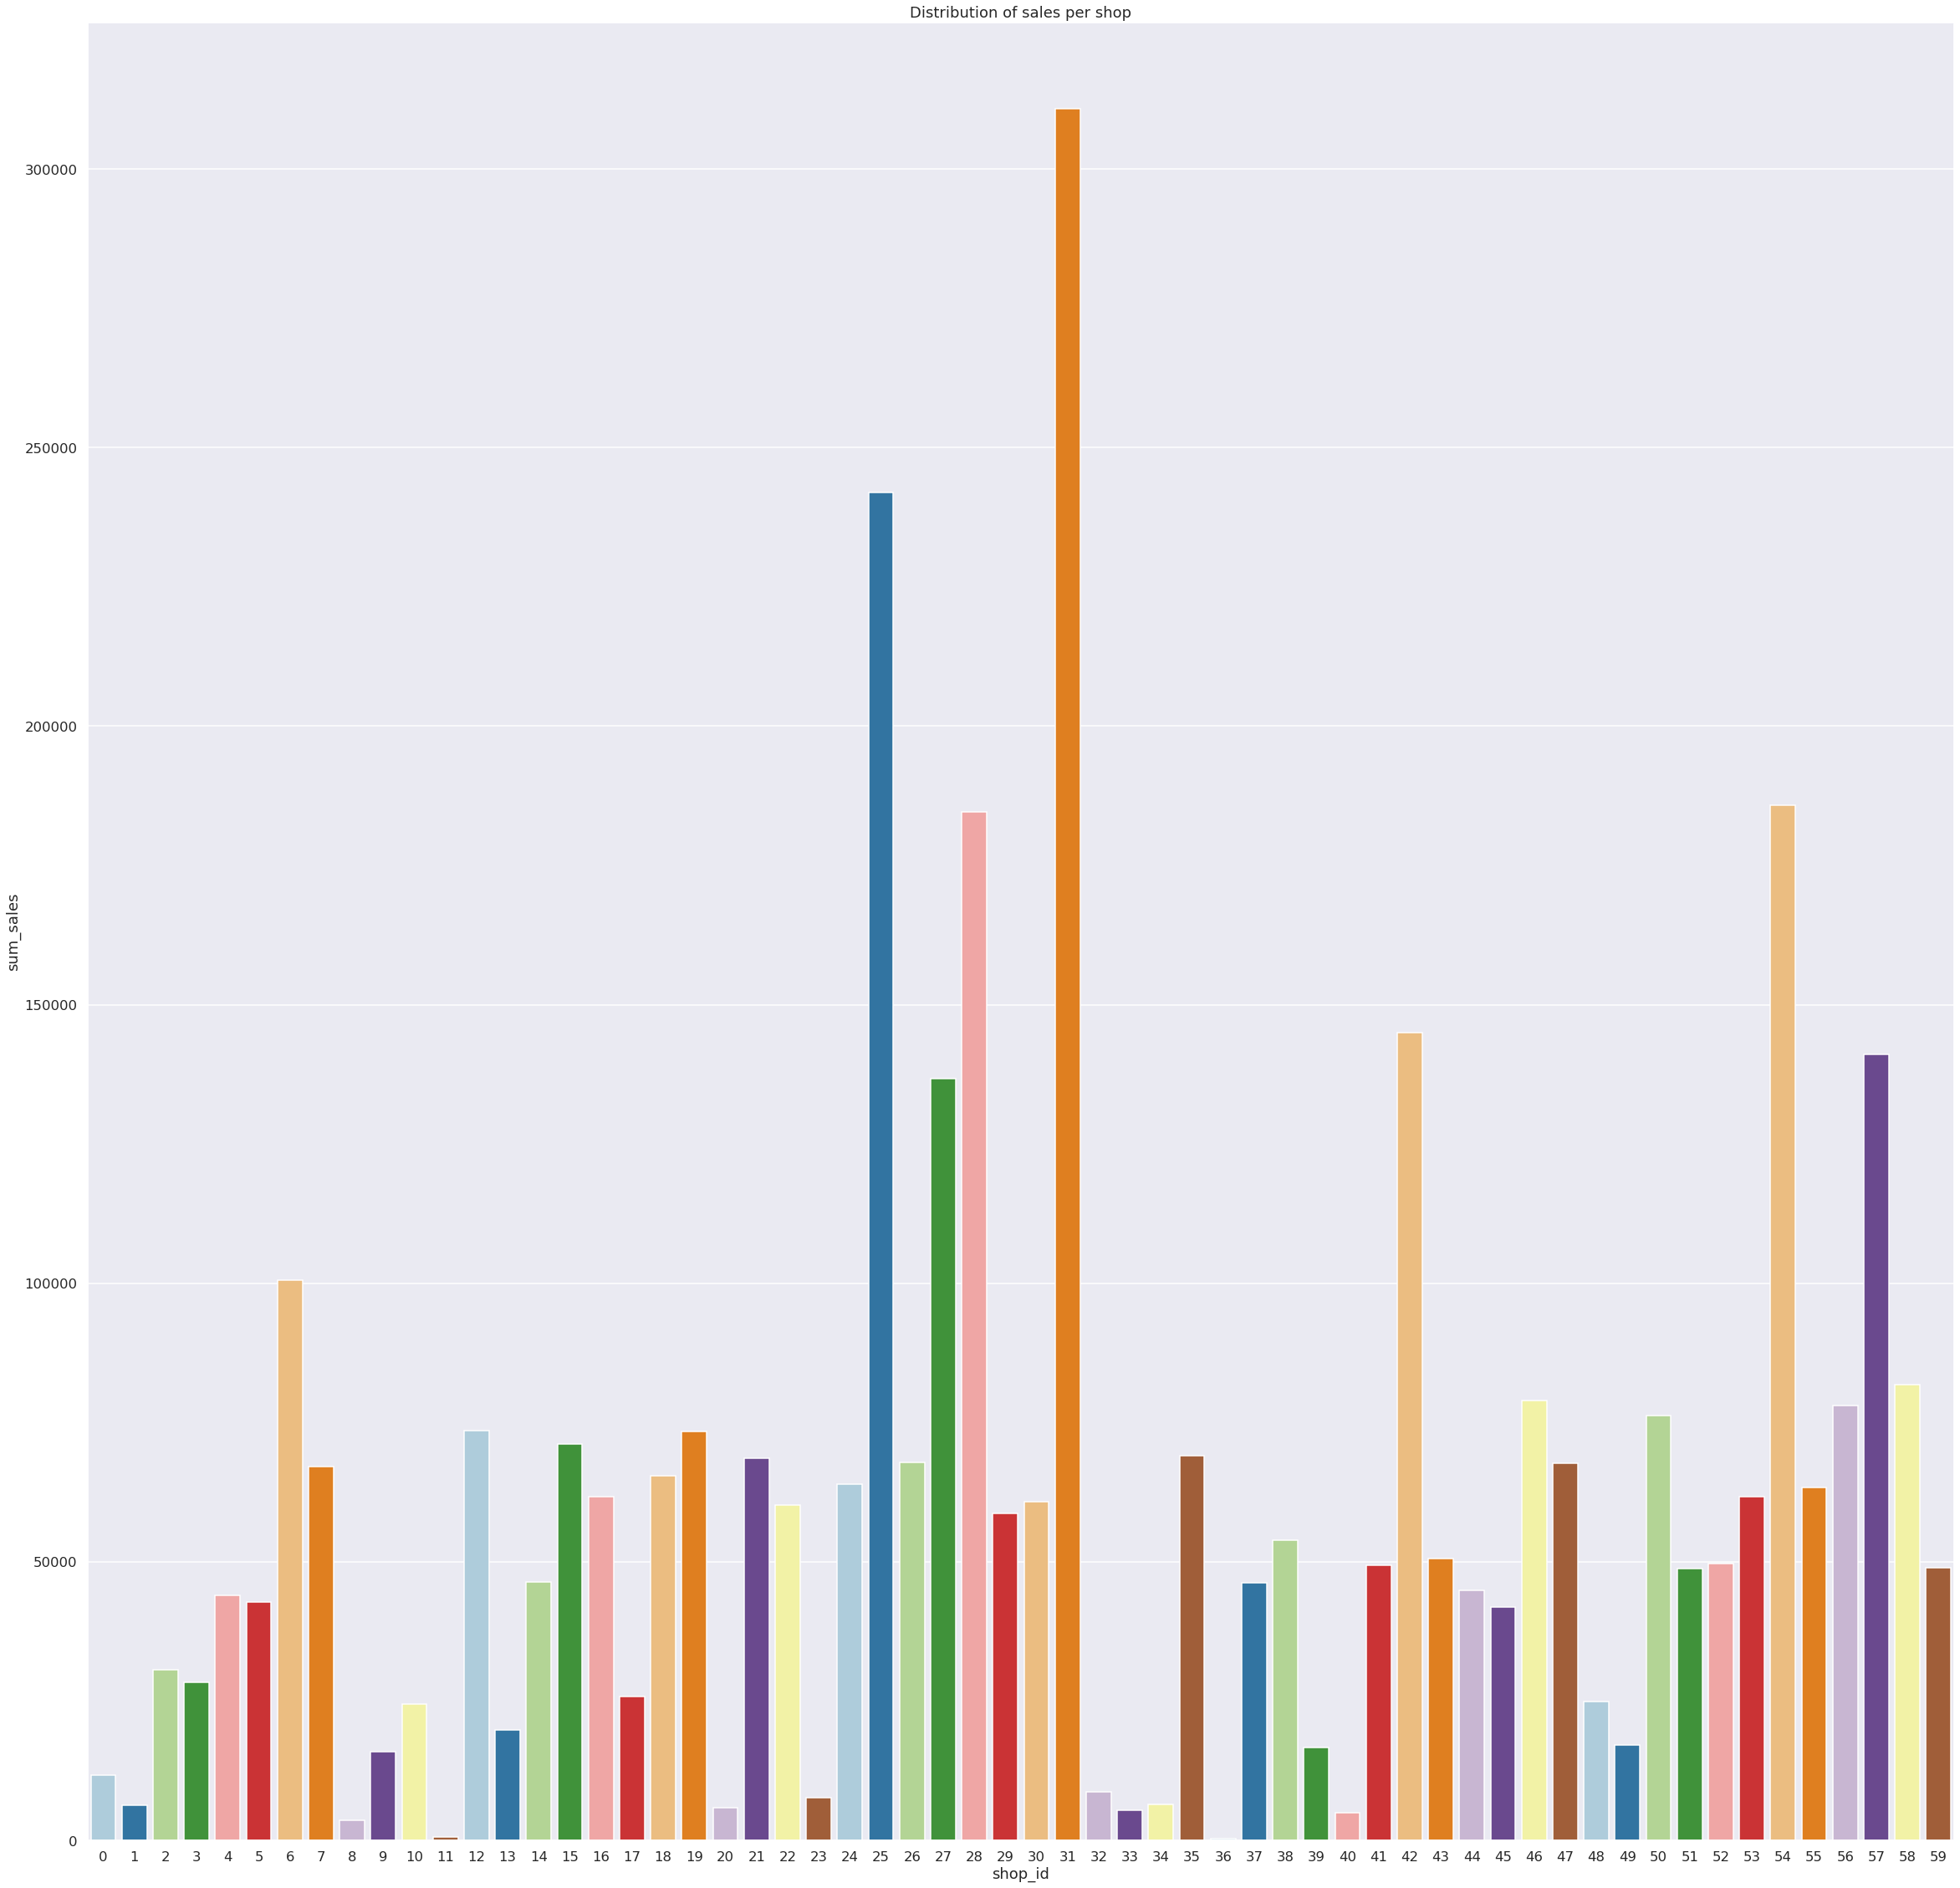

In [7]:
#Distribution Of sales Vs Shop Analysis in details and seeing how shop perform
sns.set(rc={'figure.figsize':(40, 40)})
sns.set_context("talk", font_scale=1)
sales_month_shop_id = pd.DataFrame(sales_train.groupby(['shop_id']).sum().item_cnt_day).reset_index()
sales_month_shop_id.columns = ['shop_id', 'sum_sales']
sns.barplot(x ='shop_id', y='sum_sales', data=sales_month_shop_id, palette='Paired')
plt.title('Distribution of sales per shop');
del sales_month_shop_id

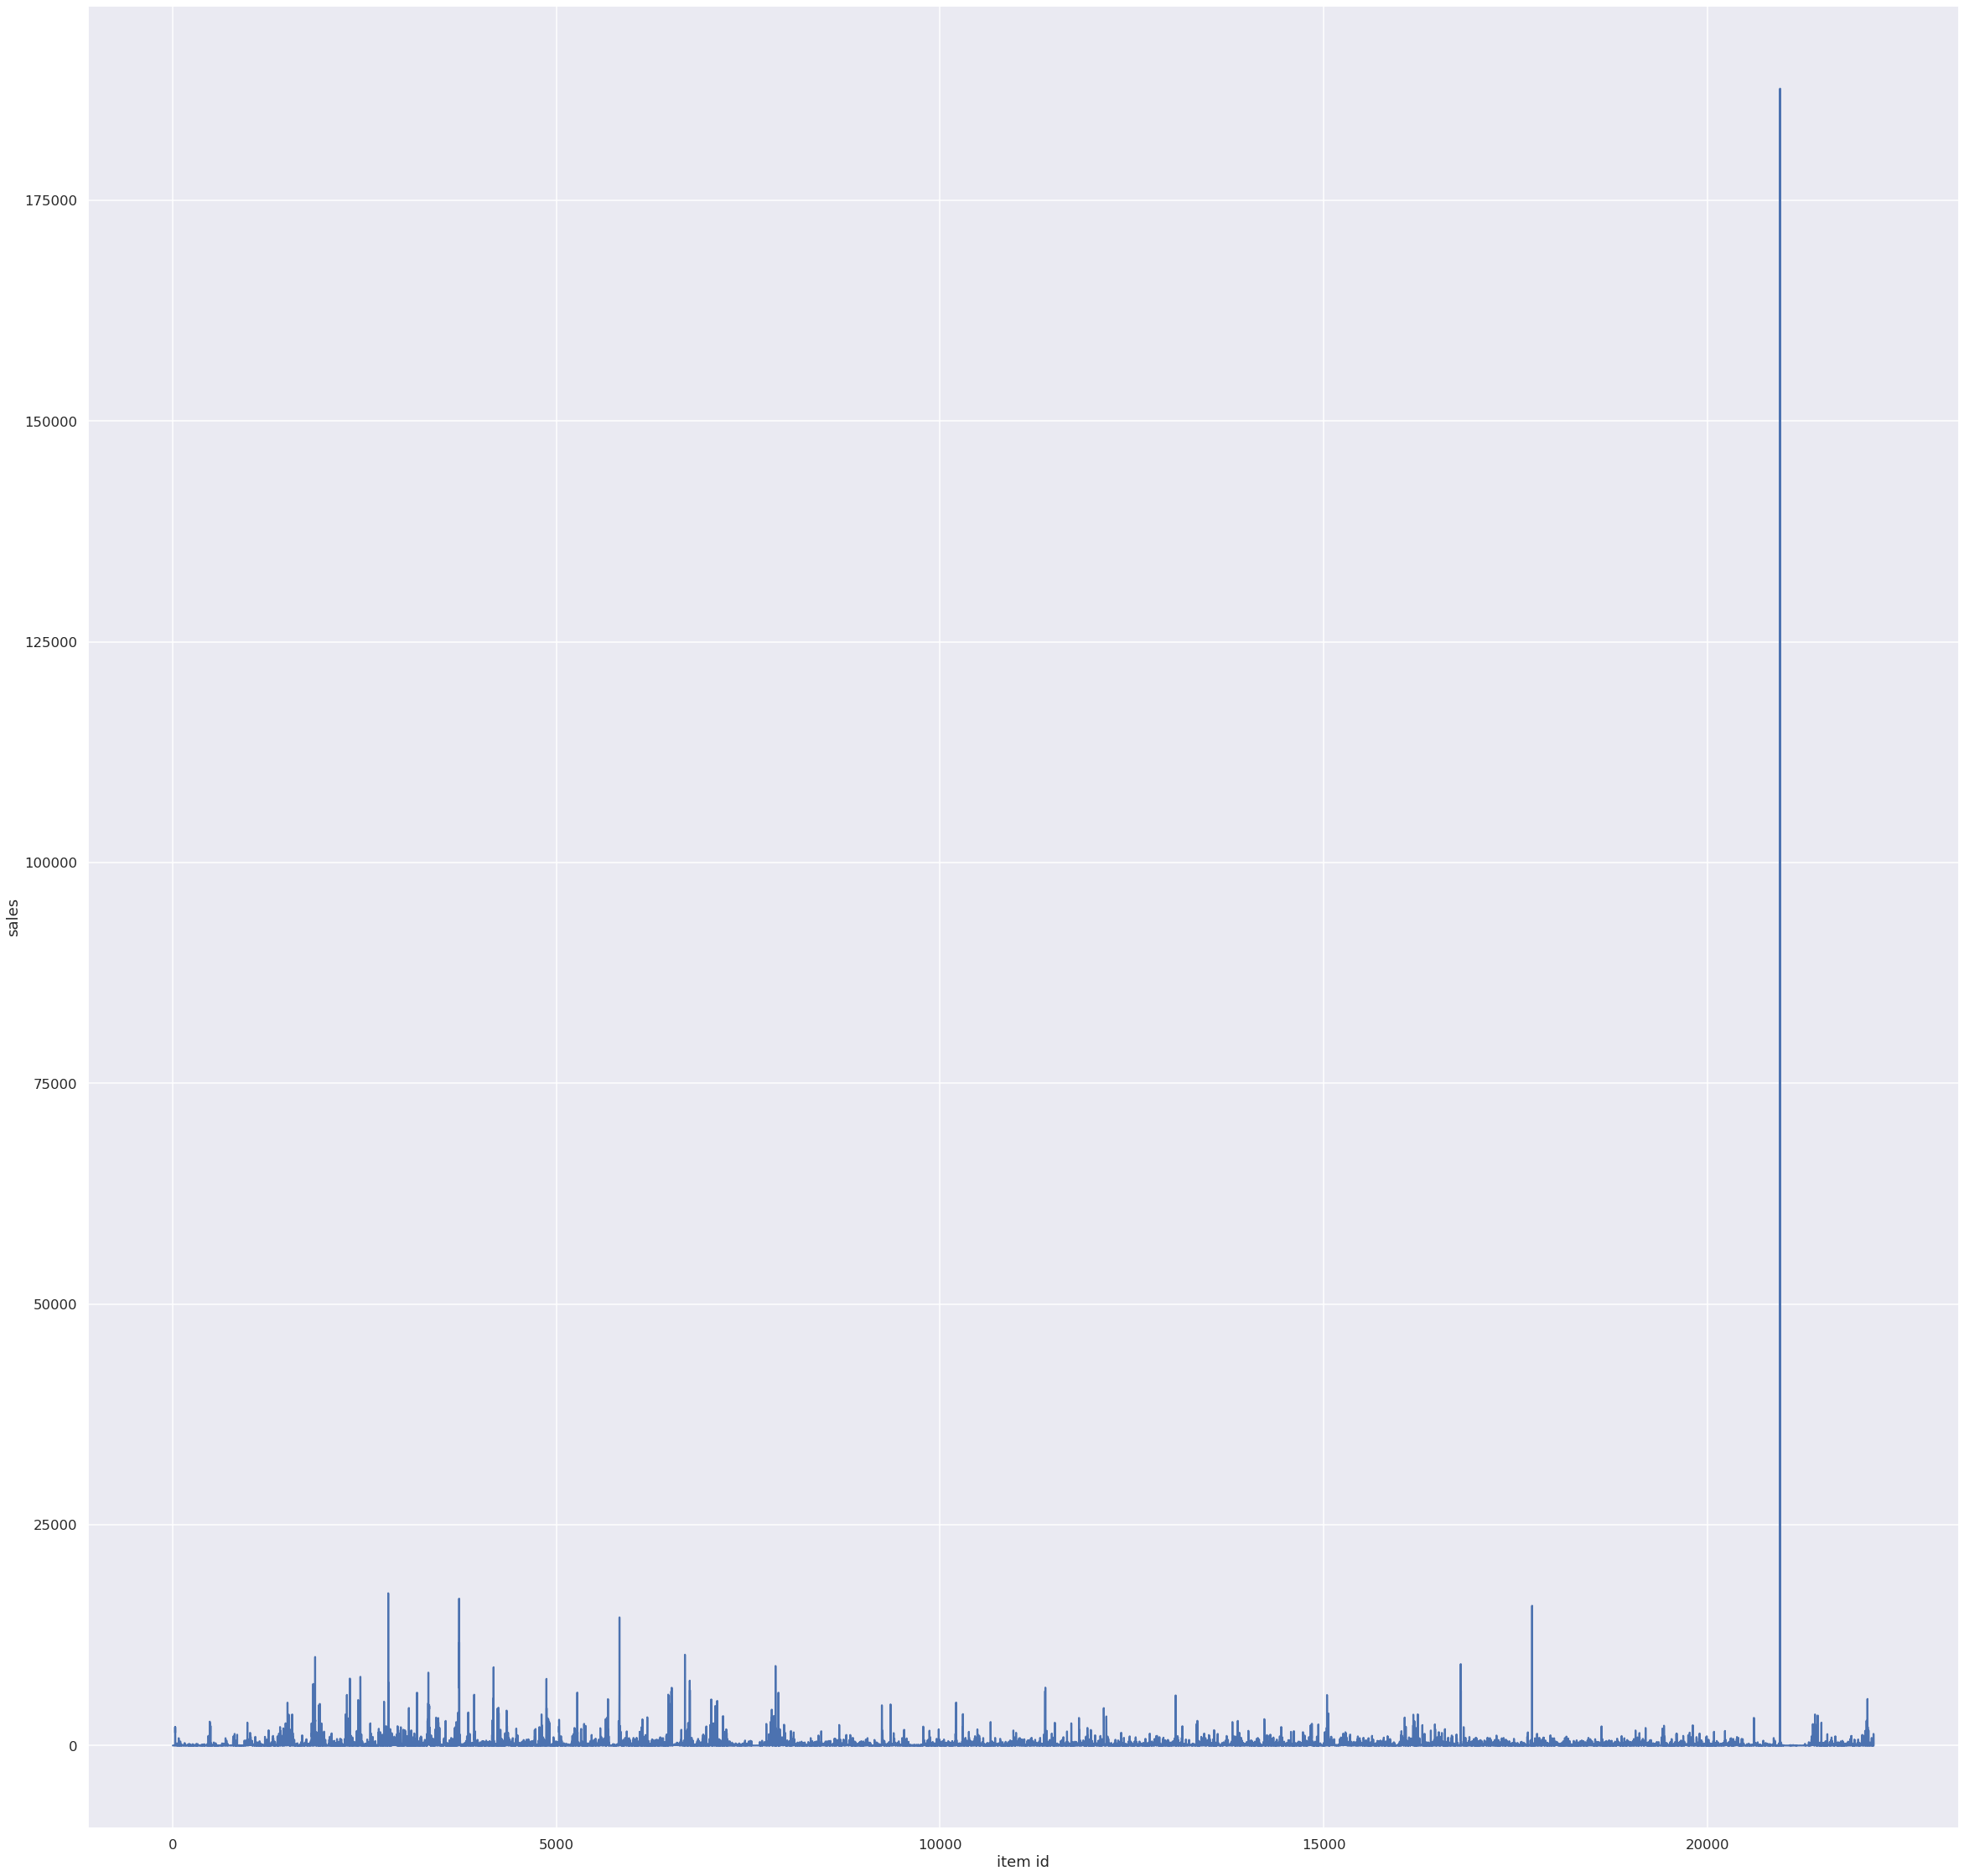

In [8]:
#Seeing Items with sales analysis
sales_item_id = pd.DataFrame(sales_train.groupby(['item_id']).sum().item_cnt_day)
plt.xlabel('item id')
plt.ylabel('sales')
plt.plot(sales_item_id)

In [9]:
#Seeing the real max item and its name and its other info
anom_item = sales_item_id.item_cnt_day.argmax()
print(anom_item)
item[item['item_id'] == 20602]

20602


,item_name,item_id,item_category_id
20602,"Фигурка Marvel Universe Deadpool POP 3,75""",20602,72


#  **Checking For Any Outliers IF Any**

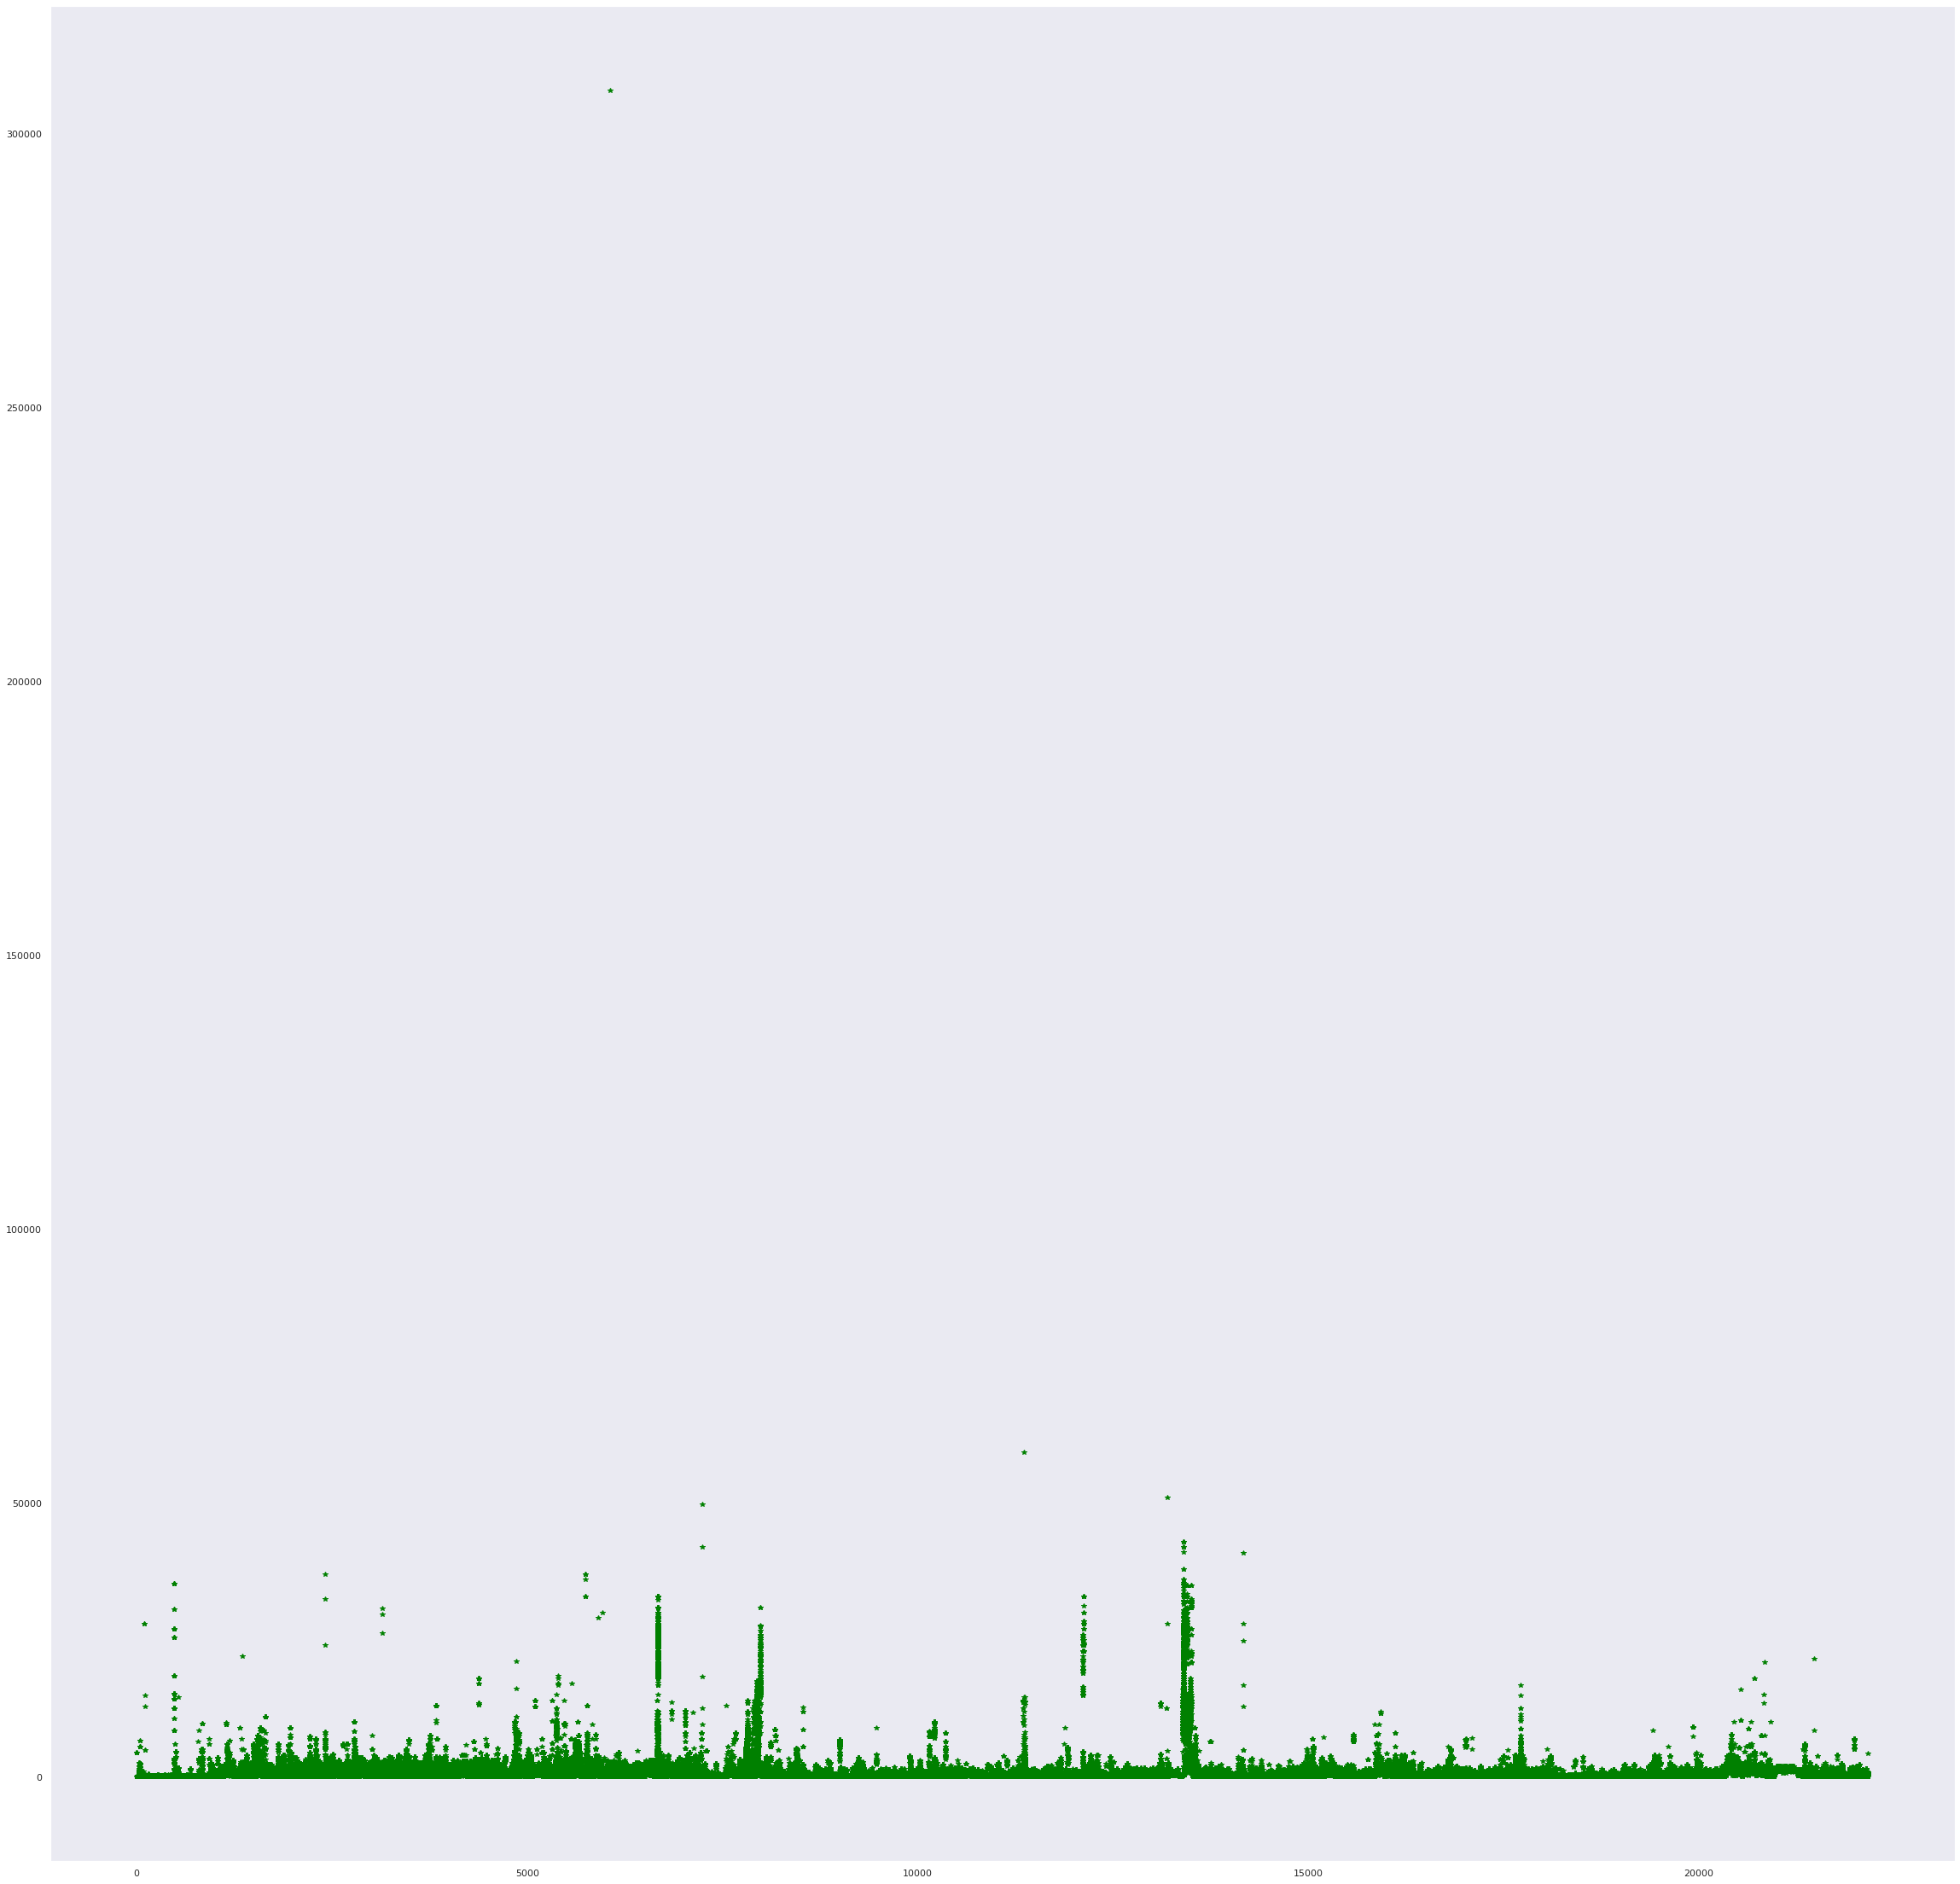

In [10]:
# we will try to plot how does the items matches
sns.set(style = "dark")
plt.plot(sales_train['item_id'], sales_train['item_price'], '*', color='Green');

We will see that there are not many outliers but a few that is very harmful in the algo

In [11]:
sales_train[sales_train['item_price'] > 50000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
885138,17.09.2013,8,12,11365,59200.0,1.0
1163158,13.12.2013,11,12,6066,307980.0,1.0
1488135,20.03.2014,14,25,13199,50999.0,1.0


We See three but two are very close to most so can be ignored and can even be taken 

In [12]:
print(item[item['item_id'] == 6066])
print(item[item['item_id'] == 11365])
print(item[item['item_id'] == 13199])

                 item_name  item_id  item_category_id
6066  Radmin 3  - 522 лиц.     6066                75
            item_name  item_id  item_category_id
11365  Доставка (EMS)    11365                 9
                                     item_name  item_id  item_category_id
13199  Коллекционные шахматы (Властелин Колец)    13199                69


In [13]:
print(item_categories[item_categories['item_category_id'] == 75])
print(item_categories[item_categories['item_category_id'] == 9])
print(item_categories[item_categories['item_category_id'] == 69])

              item_category_name  item_category_id
75  Программы - Для дома и офиса                75
  item_category_name  item_category_id
9    Доставка товара                 9
    item_category_name  item_category_id
69  Подарки - Сувениры                69


In [14]:
print(shop[shop['shop_id'] == 12])
print(shop[shop['shop_id'] == 25])

              shop_name  shop_id
12  Интернет-магазин ЧС       12
              shop_name  shop_id
25  Москва ТРК "Атриум"       25


We Have Now seen how the outliers and what dtata they really hold

In [15]:
sales_train_sub = sales_train
sales_train_sub['month'] = pd.DatetimeIndex(sales_train_sub['date']).month
sales_train_sub['year'] = pd.DatetimeIndex(sales_train_sub['date']).year
sales_train_sub.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year
0,02.01.2013,0,59,22154,999.00,1.0,2,2013
1,03.01.2013,0,25,2552,899.00,1.0,3,2013
2,05.01.2013,0,25,2552,899.00,-1.0,5,2013
3,06.01.2013,0,25,2554,1709.05,1.0,6,2013
4,15.01.2013,0,25,2555,1099.00,1.0,1,2013
5,10.01.2013,0,25,2564,349.00,1.0,10,2013
6,02.01.2013,0,25,2565,549.00,1.0,2,2013
7,04.01.2013,0,25,2572,239.00,1.0,4,2013
8,11.01.2013,0,25,2572,299.00,1.0,11,2013
9,03.01.2013,0,25,2573,299.00,3.0,3,2013


In [16]:
monthly_sales=sales_train_sub.groupby(["date_block_num","shop_id","item_id"])["item_cnt_day"].agg(item_cnt_day = 'sum')

monthly_sales['date_block_num'] = monthly_sales.index.get_level_values('date_block_num') 
monthly_sales['shop_id'] = monthly_sales.index.get_level_values('shop_id') 
monthly_sales['item_id'] = monthly_sales.index.get_level_values('item_id') 
monthly_sales.reset_index(drop=True, inplace=True)

monthly_sales = monthly_sales.reindex(['date_block_num','shop_id','item_id','item_cnt_day'], axis=1)
monthly_sales.head(10)

,date_block_num,shop_id,item_id,item_cnt_day
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0
5,0,0,61,1.0
6,0,0,75,1.0
7,0,0,88,1.0
8,0,0,95,1.0
9,0,0,96,1.0


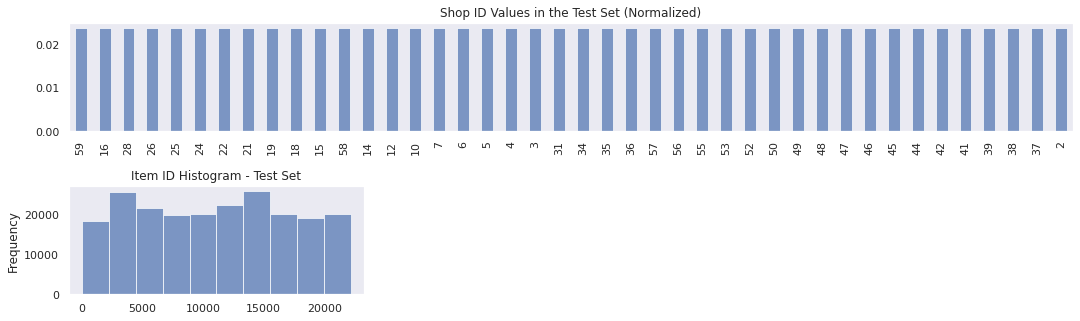

In [17]:
fig = plt.figure(figsize=(18,8))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0), colspan = 3)
testd['shop_id'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('Shop ID Values in the Test Set (Normalized)')

plt.subplot2grid((3,3), (1,0))
testd['item_id'].plot(kind='hist', alpha=0.7)
plt.title('Item ID Histogram - Test Set')

plt.show()

# Remove the outliers


In [18]:
# Remove outliers
sales_train = sales_train[sales_train.item_price <= 100000]
sales_train = sales_train[sales_train.item_cnt_day <= 1000]

# Adjusting negatice prices (change it for median values)
median = sales_train[(sales_train.shop_id == 32) & (sales_train.item_id == 2973) & (sales_train.date_block_num == 4) & (sales_train.item_price > 0)].item_price.median()
sales_train.loc[sales_train.item_price < 0, 'item_price'] = median

# Shop Data Preprossesing

In [19]:
# Якутск Орджоникидзе, 56
sales_train.loc[sales_train.shop_id == 0, 'shop_id'] = 57
testd.loc[testd.shop_id == 0, 'shop_id'] = 57
# Якутск ТЦ "Центральный"
sales_train.loc[sales_train.shop_id == 1, 'shop_id'] = 58
testd.loc[testd.shop_id == 1, 'shop_id'] = 58
# Жуковский ул. Чкалова 39м²
sales_train.loc[sales_train.shop_id == 10, 'shop_id'] = 11
testd.loc[testd.shop_id == 10, 'shop_id'] = 11
# РостовНаДону ТРК "Мегацентр Горизонт"
sales_train.loc[sales_train.shop_id == 39, 'shop_id'] = 40
testd.loc[testd.shop_id == 39, 'shop_id'] = 40

In [20]:
shop.shop_name.unique()

array(['!Якутск Орджоникидзе, 56 фран', '!Якутск ТЦ "Центральный" фран',
       'Адыгея ТЦ "Мега"', 'Балашиха ТРК "Октябрь-Киномир"',
       'Волжский ТЦ "Волга Молл"', 'Вологда ТРЦ "Мармелад"',
       'Воронеж (Плехановская, 13)', 'Воронеж ТРЦ "Максимир"',
       'Воронеж ТРЦ Сити-Парк "Град"', 'Выездная Торговля',
       'Жуковский ул. Чкалова 39м?', 'Жуковский ул. Чкалова 39м²',
       'Интернет-магазин ЧС', 'Казань ТЦ "Бехетле"',
       'Казань ТЦ "ПаркХаус" II', 'Калуга ТРЦ "XXI век"',
       'Коломна ТЦ "Рио"', 'Красноярск ТЦ "Взлетка Плаза"',
       'Красноярск ТЦ "Июнь"', 'Курск ТЦ "Пушкинский"',
       'Москва "Распродажа"', 'Москва МТРЦ "Афи Молл"',
       'Москва Магазин С21', 'Москва ТК "Буденовский" (пав.А2)',
       'Москва ТК "Буденовский" (пав.К7)', 'Москва ТРК "Атриум"',
       'Москва ТЦ "Ареал" (Беляево)', 'Москва ТЦ "МЕГА Белая Дача II"',
       'Москва ТЦ "МЕГА Теплый Стан" II',
       'Москва ТЦ "Новый век" (Новокосино)', 'Москва ТЦ "Перловский"',
       'Москва Т

In [21]:
shop.loc[shop.shop_name == 'Сергиев Посад ТЦ "7Я"', 'shop_name'] = 'СергиевПосад ТЦ "7Я"'
shop['shop_category'] = shop['shop_name'].str.split(' ').map(lambda x:x[1]).astype(str)
categories = ['Орджоникидзе,', 'ТЦ', 'ТРК', 'ТРЦ','ул.', 'Магазин', 'ТК', 'склад']
shop.shop_category = shop.shop_category.apply(lambda x: x if (x in categories) else 'etc')
shop.shop_category.unique()

array(['Орджоникидзе,', 'ТЦ', 'ТРК', 'ТРЦ', 'etc', 'ул.', 'Магазин', 'ТК',
       'склад'], dtype=object)

In [22]:
shop.groupby(['shop_category']).sum()

,shop_id
shop_category,
etc,68
Магазин,22
"Орджоникидзе,",57
ТК,184
ТРК,140
ТРЦ,340
ТЦ,883
склад,55
ул.,21


In [23]:
from sklearn.preprocessing import LabelEncoder
category = ['ТЦ', 'ТРК', 'ТРЦ', 'ТК']
shop.shop_category = shop.shop_category.apply(lambda x: x if (x in category) else 'etc')
print('Category Distribution', shop.groupby(['shop_category']).sum())

shop['shop_category_code'] = LabelEncoder().fit_transform(shop['shop_category'])

Category Distribution                shop_id
shop_category         
etc                223
ТК                 184
ТРК                140
ТРЦ                340
ТЦ                 883


In [24]:
shop['city'] = shop['shop_name'].str.split(' ').map(lambda x: x[0])
shop.loc[shop.city == '!Якутск', 'city'] = 'Якутск'
shop['city_code'] = LabelEncoder().fit_transform(shop['city'])
shop = shop[['shop_id','city_code', 'shop_category_code']]

shop.head()

,shop_id,city_code,shop_category_code
0,0,29,0
1,1,29,4
2,2,0,4
3,3,1,2
4,4,2,4


# Data Preprossing

In [25]:
print(len(item_categories.item_category_name.unique()))
item_categories.item_category_name.unique()

84


array(['PC - Гарнитуры/Наушники', 'Аксессуары - PS2', 'Аксессуары - PS3',
       'Аксессуары - PS4', 'Аксессуары - PSP', 'Аксессуары - PSVita',
       'Аксессуары - XBOX 360', 'Аксессуары - XBOX ONE', 'Билеты (Цифра)',
       'Доставка товара', 'Игровые консоли - PS2',
       'Игровые консоли - PS3', 'Игровые консоли - PS4',
       'Игровые консоли - PSP', 'Игровые консоли - PSVita',
       'Игровые консоли - XBOX 360', 'Игровые консоли - XBOX ONE',
       'Игровые консоли - Прочие', 'Игры - PS2', 'Игры - PS3',
       'Игры - PS4', 'Игры - PSP', 'Игры - PSVita', 'Игры - XBOX 360',
       'Игры - XBOX ONE', 'Игры - Аксессуары для игр',
       'Игры Android - Цифра', 'Игры MAC - Цифра',
       'Игры PC - Дополнительные издания',
       'Игры PC - Коллекционные издания', 'Игры PC - Стандартные издания',
       'Игры PC - Цифра', 'Карты оплаты (Кино, Музыка, Игры)',
       'Карты оплаты - Live!', 'Карты оплаты - Live! (Цифра)',
       'Карты оплаты - PSN', 'Карты оплаты - Windows (Цифра)',

In [26]:
item_categories['type'] = item_categories.item_category_name.apply(lambda x: x.split(' ')[0]).astype(str)
item_categories.loc[(item_categories.type == 'Игровые') | (item_categories.type == 'Аксессуары'), 'category'] = 'Игры'
item_categories.loc[item_categories.type == 'PC', 'category'] = 'Музыка'
category = ['Игры', 'Карты', 'Кино', 'Книги','Музыка', 'Подарки', 'Программы', 'Служебные', 'Чистые', 'Аксессуары']
item_categories['type'] = item_categories.type.apply(lambda x: x if (x in category) else 'etc')
print(item_categories.groupby(['type']).sum())
item_categories['type_code'] = LabelEncoder().fit_transform(item_categories['type'])

# if subtype is nan then type
item_categories['split'] = item_categories.item_category_name.apply(lambda x: x.split('-'))
item_categories['subtype'] = item_categories['split'].map(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())
item_categories['subtype_code'] = LabelEncoder().fit_transform(item_categories['subtype'])
item_categories = item_categories[['item_category_id','type_code', 'subtype_code']]

item_categories.head()

            item_category_id
type                        
etc                      208
Аксессуары                28
Игры                     343
Карты                    170
Кино                     195
Книги                    624
Музыка                   345
Подарки                  798
Программы                453
Служебные                159
Чистые                   163


,item_category_id,type_code,subtype_code
0,0,0,29
1,1,1,9
2,2,1,10
3,3,1,11
4,4,1,13


# Train and test data

In [27]:
sales_train['date']

0          02.01.2013
1          03.01.2013
2          05.01.2013
3          06.01.2013
4          15.01.2013
              ...    
2935844    10.10.2015
2935845    09.10.2015
2935846    14.10.2015
2935847    22.10.2015
2935848    03.10.2015
Name: date, Length: 2935847, dtype: object

In [28]:
sales_train['date'] = pd.to_datetime(sales_train['date'], format='%d.%m.%Y')
sales_train['month'] = sales_train['date'].dt.month
sales_train['year'] = sales_train['date'].dt.year
sales_train = sales_train.drop(columns=['date'])

# sales.head()
to_append = testd[['shop_id', 'item_id']].copy()

to_append['date_block_num'] = sales_train['date_block_num'].max() + 1
to_append['year'] = 2015
to_append['month'] = 11
to_append['item_cnt_day'] = 0
to_append['item_price'] = 0

sales_train = pd.concat([sales_train, to_append], ignore_index=True, sort=False)
sales_train.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year
0,0,59,22154,999.00,1.0,1,2013
1,0,25,2552,899.00,1.0,1,2013
2,0,25,2552,899.00,-1.0,1,2013
3,0,25,2554,1709.05,1.0,1,2013
4,0,25,2555,1099.00,1.0,1,2013


# Date Data

In [29]:
from calendar import monthrange
period = sales_train[['date_block_num', 'year', 'month']].drop_duplicates().reset_index(drop=True)
period['days'] = period.apply(lambda r: monthrange(r.year, r.month)[1], axis=1)

sales_train = sales_train.drop(columns=['month', 'year'])

period.head()


,date_block_num,year,month,days
0,0,2013,1,31
1,1,2013,2,28
2,2,2013,3,31
3,3,2013,4,30
4,4,2013,5,31


In [30]:
from itertools import product
index_cols = ['date_block_num', 'shop_id', 'item_id']
grid = [] 
for block_num in sales_train['date_block_num'].unique():
    cur_shops = sales_train.loc[sales_train['date_block_num'] == block_num, 'shop_id'].unique()
    cur_items = sales_train.loc[sales_train['date_block_num'] == block_num, 'item_id'].unique()
    grid.append(np.array(list(product(*[[block_num], cur_shops, cur_items])), dtype='int16'))

# Turn the grid into a dataframe
grid = pd.DataFrame(np.vstack(grid), columns = index_cols, dtype = np.int16)
grid.head()

,date_block_num,shop_id,item_id
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564


In [31]:
data = pd.merge(grid, shop, on='shop_id')
data = pd.merge(data, item, on='item_id')
data = pd.merge(data, item_categories, on='item_category_id')
data = pd.merge(data, period, on='date_block_num')


In [32]:
data

,date_block_num,shop_id,item_id,city_code,shop_category_code,item_name,item_category_id,type_code,subtype_code,year,month,days
0,0,59,22154,30,4,ЯВЛЕНИЕ 2012 (BD),37,4,1,2013,1,31
1,0,25,22154,13,2,ЯВЛЕНИЕ 2012 (BD),37,4,1,2013,1,31
2,0,24,22154,13,1,ЯВЛЕНИЕ 2012 (BD),37,4,1,2013,1,31
3,0,23,22154,13,1,ЯВЛЕНИЕ 2012 (BD),37,4,1,2013,1,31
4,0,19,22154,12,4,ЯВЛЕНИЕ 2012 (BD),37,4,1,2013,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...
11056272,29,55,9244,27,0,"Билет ""ИгроМир 2015"" - 2 октября 2015 (сайт) [...",80,9,25,2015,6,30
11056273,29,49,9244,24,3,"Билет ""ИгроМир 2015"" - 2 октября 2015 (сайт) [...",80,9,25,2015,6,30
11056274,29,40,9244,18,2,"Билет ""ИгроМир 2015"" - 2 октября 2015 (сайт) [...",80,9,25,2015,6,30
11056275,29,48,9244,23,3,"Билет ""ИгроМир 2015"" - 2 октября 2015 (сайт) [...",80,9,25,2015,6,30


In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from calendar import monthrange
from itertools import product

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [34]:
type(data)

pandas.core.frame.DataFrame

In [35]:
data1 = data[['date_block_num', 'year', 'month','days']]# 'item_price', 'item_cnt_day'


In [36]:
# Adjusting columns order
data = data[['date_block_num', 'year', 'month', 'days', 'city_code', 'shop_category_code', 'shop_id', 'item_category_id', 'type_code', 'subtype_code', 'item_id']] # 'item_price', 'item_cnt_day'

# Downcasting values
for c in ['date_block_num', 'month', 'days', 'city_code', 'shop_category_code', 'shop_id', 'item_category_id', 'type_code', 'subtype_code']:
    data[c] = data[c].astype(np.int8)
data['item_id'] = data['item_id'].astype(np.int16)
data['year'] = data['year'].astype(np.int16)

# Remove unused and temporary datasets
del grid, shop, item, item_categories, to_append

data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,date_block_num,year,month,days,city_code,shop_category_code,shop_id,item_category_id,type_code,subtype_code,item_id
0,0,2013,1,31,30,4,59,37,4,1,22154
1,0,2013,1,31,13,2,25,37,4,1,22154
2,0,2013,1,31,13,1,24,37,4,1,22154
3,0,2013,1,31,13,1,23,37,4,1,22154
4,0,2013,1,31,12,4,19,37,4,1,22154


In [37]:
aux = sales_train\
.groupby(['date_block_num', 'shop_id', 'item_id'], as_index=False)\
.agg({'item_cnt_day' : 'sum', 'item_price' : 'mean'})\
.rename(columns= {'item_cnt_day' : 'item_cnt_month', 'item_price' : 'item_price_month'})

aux['item_cnt_month'] = aux['item_cnt_month'].astype(np.float16)
aux['item_price_month'] = aux['item_price_month'].astype(np.float16)

month_summary = pd.merge(data, aux, how='left', on=['date_block_num', 'shop_id', 'item_id'])\
    .fillna(0.0).sort_values(by=['shop_id', 'item_id', 'date_block_num'])

del data, aux

month_summary.head()

,date_block_num,year,month,days,city_code,shop_category_code,shop_id,item_category_id,type_code,subtype_code,item_id,item_cnt_month,item_price_month
8400303,20,2014,9,30,0,4,2,40,4,4,0,0.0,0.0
6932023,15,2014,4,30,0,4,2,76,8,31,1,0.0,0.0
7896786,18,2014,7,31,0,4,2,76,8,31,1,0.0,0.0
8214518,19,2014,8,31,0,4,2,76,8,31,1,0.0,0.0
8506878,20,2014,9,30,0,4,2,76,8,31,1,0.0,0.0


checcking essentials


In [38]:
print('Min: {} and Max: {} item_cnt_month values'.format(month_summary['item_cnt_month'].min(), month_summary['item_cnt_month'].max()))

Min: -22.0 and Max: 1644.0 item_cnt_month values


In [39]:
month_summary['item_cnt_month'] = month_summary['item_cnt_month'].clip(0,20)

# Mean Encoding

In [40]:
def agg_by(month_summary, group_cols, new_col, target_col = 'item_cnt_month', agg_func = 'mean'):
    aux = month_summary\
        .groupby(group_cols, as_index=False)\
        .agg({target_col : agg_func})\
        .rename(columns= {target_col : new_col})
    aux[new_col] = aux[new_col].astype(np.float16)

    return pd.merge(month_summary, aux, how='left', on=group_cols)

def lag_feature(df, col, lags=[1,2,3,6,12]):
    tmp = df[['date_block_num','shop_id','item_id', col]]
    for i in lags:
        shifted = tmp.copy()
        cols = ['date_block_num','shop_id','item_id', '{}_lag_{}'.format(col, i)]
        shifted.columns = cols
        shifted['date_block_num'] += i
        df = pd.merge(df, shifted, on=['date_block_num','shop_id','item_id'], how='left').fillna(value={(cols[-1]) : 0.0})
    return df

def agg_by_and_lag(month_summary, group_cols, new_col, lags=[1,2,3,6,12], target_col = 'item_cnt_month', agg_func = 'mean'):
    tmp = agg_by(month_summary, group_cols, new_col, target_col, agg_func)
    tmp = lag_feature(tmp, new_col, lags)
    return tmp.drop(columns=[new_col])

In [41]:
month_summary = agg_by_and_lag(month_summary, ['date_block_num'], 'date_avg_item_cnt', [1])

month_summary = agg_by_and_lag(month_summary, ['date_block_num', 'item_id'], 'date_item_avg_item_cnt', [1,2,3,6,12])

month_summary = agg_by_and_lag(month_summary, ['date_block_num', 'city_code'], 'date_city_avg_item_cnt', [1])

month_summary = agg_by_and_lag(month_summary, ['date_block_num', 'shop_id'], 'date_shop_avg_item_cnt', [1,2,3,6,12])

month_summary = agg_by_and_lag(month_summary, ['date_block_num', 'item_category_id'], 'date_cat_avg_item_cnt', [1])

month_summary = agg_by_and_lag(month_summary, ['date_block_num', 'type_code'], 'date_type_avg_item_cnt', [1])

month_summary = agg_by_and_lag(month_summary, ['date_block_num', 'subtype_code'], 'date_subtype_avg_item_cnt', [1])

month_summary = agg_by_and_lag(month_summary, ['date_block_num', 'shop_category_code'], 'date_shop_category_avg_item_cnt', [1])

month_summary = agg_by_and_lag(month_summary, ['date_block_num', 'shop_id', 'item_category_id'], 'date_shop_cat_avg_item_cnt', [1])

month_summary = agg_by_and_lag(month_summary, ['date_block_num', 'shop_id', 'type_code'], 'date_shop_type_avg_item_cnt', [1])

month_summary = agg_by_and_lag(month_summary, ['date_block_num', 'shop_id', 'subtype_code'], 'date_shop_subtype_avg_item_cnt', [1])

month_summary = agg_by_and_lag(month_summary, ['date_block_num', 'shop_category_code', 'subtype_code'], 'date_shop_category_subtype_avg_item_cnt', [1])

month_summary = agg_by_and_lag(month_summary, ['date_block_num', 'city_code', 'item_id'], 'date_item_city_avg_item_cnt', [1])

In [42]:
month_summary = agg_by_and_lag(month_summary, ['date_block_num'], 'date_avg_item_price', [1], 'item_price_month')

month_summary = agg_by_and_lag(month_summary, ['date_block_num', 'item_id'], 'date_item_avg_item_price', [1,2,3,6,12], 'item_price_month')

month_summary = agg_by_and_lag(month_summary, ['date_block_num', 'city_code'], 'date_city_avg_item_price', [1], 'item_price_month')

month_summary = agg_by_and_lag(month_summary, ['date_block_num', 'shop_id'], 'date_shop_avg_item_price', [1,2,3,6,12], 'item_price_month')

month_summary = agg_by_and_lag(month_summary, ['date_block_num', 'item_category_id'], 'date_cat_avg_item_price', [1], 'item_price_month')

month_summary = agg_by_and_lag(month_summary, ['date_block_num', 'type_code'], 'date_type_avg_item_price', [1], 'item_price_month')

month_summary = agg_by_and_lag(month_summary, ['date_block_num', 'subtype_code'], 'date_subtype_avg_item_price', [1], 'item_price_month')

month_summary = agg_by_and_lag(month_summary, ['date_block_num', 'shop_category_code'], 'date_shop_category_avg_item_price', [1], 'item_price_month')

month_summary = agg_by_and_lag(month_summary, ['date_block_num', 'shop_id', 'item_category_id'], 'date_shop_cat_avg_item_price', [1], 'item_price_month')

month_summary = agg_by_and_lag(month_summary, ['date_block_num', 'shop_id', 'type_code'], 'date_shop_type_avg_item_price', [1], 'item_price_month')

month_summary = agg_by_and_lag(month_summary, ['date_block_num', 'shop_id', 'subtype_code'], 'date_shop_subtype_avg_item_price', [1], 'item_price_month')

month_summary = agg_by_and_lag(month_summary, ['date_block_num', 'shop_category_code', 'subtype_code'], 'date_shop_category_subtype_avg_item_price', [1], 'item_price_month')

month_summary = agg_by_and_lag(month_summary, ['date_block_num', 'city_code', 'item_id'], 'date_item_city_avg_item_price', [1], 'item_price_month')

# features

In [43]:
month_summary['item_shop_first_sale'] = month_summary['date_block_num'] - month_summary.groupby(['item_id','shop_id'])['date_block_num'].transform('min')
month_summary['item_first_sale'] = month_summary['date_block_num'] - month_summary.groupby('item_id')['date_block_num'].transform('min')

In [44]:
month_summary.to_pickle('month_summary.pkl')
month_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11056277 entries, 0 to 11056276
Data columns (total 57 columns):
 #   Column                                           Dtype  
---  ------                                           -----  
 0   date_block_num                                   int8   
 1   year                                             int16  
 2   month                                            int8   
 3   days                                             int8   
 4   city_code                                        int8   
 5   shop_category_code                               int8   
 6   shop_id                                          int8   
 7   item_category_id                                 int8   
 8   type_code                                        int8   
 9   subtype_code                                     int8   
 10  item_id                                          int16  
 11  item_cnt_month                                   float16
 12  item_price_m

# Split data

In [45]:
month_summary = pd.read_pickle('month_summary.pkl')

In [46]:
def generate_subsample(month_summary, target='item_cnt_month'):
    X_test = month_summary[month_summary['date_block_num'] == 34]
    X_test = X_test.drop(columns=[target])

    X_val = month_summary[month_summary['date_block_num'] == 33]
    y_val = X_val[target]
    X_val = X_val.drop(columns=[target])

    X_train = month_summary[(month_summary['date_block_num'] >= 12) & (month_summary['date_block_num'] < 33)]
    y_train = X_train[target]
    X_train = X_train.drop(columns=[target])

    return X_train, y_train, X_val, y_val, X_test

In [47]:
X_train, y_train, X_val, y_val, X_test = generate_subsample(month_summary.drop(columns=['item_price_month']), 'item_cnt_month')

del month_summary

# Train Moodel


In [48]:
def train_gbmodel(X_train, y_train, X_val, y_val):

    RAND_SEED = 42

    lgb_params = {'num_leaves': 2**8, 'max_depth': 19, 'max_bin': 107, #'n_estimators': 3747,
              'bagging_freq': 1, 'bagging_fraction': 0.7135681370918421, 
              'feature_fraction': 0.49446461478601994, 'min_data_in_leaf': 2**8, # 88
              'learning_rate': 0.015980721586917768, 'num_threads': 2, 
              'min_sum_hessian_in_leaf': 6,
              'random_state' : RAND_SEED,
              'bagging_seed' : RAND_SEED,
              'boost_from_average' : 'true',
              'boost' : 'gbdt',
              'metric' : 'rmse',
              'verbose' : 1}

    lgb_train = lgb.Dataset(X_train, label=y_train)
    lgb_val = lgb.Dataset(X_val, label=y_val)

    return lgb.train(lgb_params, lgb_train, 
                      num_boost_round=300,
                      valid_sets=[lgb_train, lgb_val],
                      early_stopping_rounds=20)

In [49]:
# model_old_item = train_gbmodel(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]).clip(0, 20), X_val, y_val.clip(0, 20))
gbm_model = train_gbmodel(X_train, y_train, X_val, y_val)

y_hat = gbm_model.predict(X_val).clip(0, 20)
print(np.sqrt(mean_squared_error(y_val.clip(0, 20), y_hat)))

with open('./gbm_model.pickle', 'wb') as handle:
    pickle.dump(gbm_model, handle)

[1]	training's rmse: 1.18713	valid_1's rmse: 1.13098
Training until validation scores don't improve for 20 rounds
[2]	training's rmse: 1.17975	valid_1's rmse: 1.12626
[3]	training's rmse: 1.17341	valid_1's rmse: 1.12157
[4]	training's rmse: 1.16638	valid_1's rmse: 1.1162
[5]	training's rmse: 1.15856	valid_1's rmse: 1.1103
[6]	training's rmse: 1.1516	valid_1's rmse: 1.10507
[7]	training's rmse: 1.14418	valid_1's rmse: 1.09982
[8]	training's rmse: 1.137	valid_1's rmse: 1.09465
[9]	training's rmse: 1.12979	valid_1's rmse: 1.08949
[10]	training's rmse: 1.12278	valid_1's rmse: 1.08498
[11]	training's rmse: 1.11577	valid_1's rmse: 1.08003
[12]	training's rmse: 1.10895	valid_1's rmse: 1.07553
[13]	training's rmse: 1.10237	valid_1's rmse: 1.07088
[14]	training's rmse: 1.09633	valid_1's rmse: 1.06685
[15]	training's rmse: 1.09091	valid_1's rmse: 1.06294
[16]	training's rmse: 1.08467	valid_1's rmse: 1.0585
[17]	training's rmse: 1.07922	valid_1's rmse: 1.05484
[18]	training's rmse: 1.07415	valid_

In [50]:
y_pred = gbm_model.predict(X_test).clip(0, 20)

result = pd.merge(testd, X_test.assign(item_cnt_month=y_pred), how='left', on=['shop_id', 'item_id'])[['ID', 'item_cnt_month']]
result.to_csv('submission.csv', index=False)

In [51]:
pd.read_csv('./submission.csv')

,ID,item_cnt_month
0,0,0.985594
1,1,0.637446
2,2,1.160747
3,3,0.639769
4,4,1.378137
...,...,...
214195,214195,0.054566
214196,214196,0.038098
214197,214197,0.055677
214198,214198,0.025866
